## ` Necessary Library`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from scipy.stats.mstats import winsorize
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from xgboost import XGBRFRegressor
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore') 

## ` Feature Discription`

In [2]:
dic=pd.read_excel('Data_Dictionary.xlsx')
dic=dic.set_index('Variable')
dic

,Description
Variable,
ID,Unique ID for every Customer
account_type,Account Type – current or saving
gender,Gender of customer
age,Age of customer
region_code,Code assigned to region of residence (has order)
cc_cons_apr,Credit card spend in April
dc_cons_apr,Debit card spend in April
cc_cons_may,Credit card spend in May
dc_cons_may,Debit card spend in May


## `Data loading `

In [3]:
data_train=pd.read_csv('train.csv').set_index('ID')
data_train.head()

,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
ID,,,,,,,,,,,,,,,,,,,,,
12554,current,M,35,708,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,...,40.0,24563.0,30051.32,12761.0,2.0,65.0,50836.0,Y,1674.09,20014.0
17645,current,M,35,123,18941.62,966.00,20672.00,287.00,4217.00,885.00,...,78.0,23948.0,42119.05,76206.0,21.0,63.0,23226.0,Y,13043.34,10173.0
7604,current,M,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,...,82.0,10752.0,58373.25,75283.0,7.0,1.0,27036.0,Y,25375.27,16095.0
1590,current,F,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,...,38.0,12607.0,69851.51,68708.0,21.0,83.0,43037.0,Y,3544.33,7707.0
16556,current,M,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,...,50.0,25213.0,10071.00,80140.0,8.0,32.0,32044.0,Y,12780.44,96408.0


### <b> `Null value Cheack` <b>

In [4]:
def null_value_cheak(dataframe):
    null_value=dataframe.isna().sum()
    return null_value


null_value_cheak(data_train)

account_type             0
gender                   0
age                      0
region_code              0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              0
dc_cons_may              0
cc_cons_jun              0
dc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
personal_loan_active     0
vehicle_loan_active      0
personal_loan_closed     0
vehicle_loan_closed      0
investment_1             0
investment_2             0
investment_3             0
investment_4             0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
c

Description:-dataset dont have "null" value..

### ` Data basic information and description:-`

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 12554 to 4547
Data columns (total 43 columns):
account_type             15000 non-null object
gender                   15000 non-null object
age                      15000 non-null int64
region_code              15000 non-null int64
cc_cons_apr              15000 non-null float64
dc_cons_apr              15000 non-null float64
cc_cons_may              15000 non-null float64
dc_cons_may              15000 non-null float64
cc_cons_jun              15000 non-null float64
dc_cons_jun              15000 non-null float64
cc_count_apr             15000 non-null float64
cc_count_may             15000 non-null float64
cc_count_jun             15000 non-null float64
dc_count_apr             15000 non-null float64
dc_count_may             15000 non-null float64
dc_count_jun             15000 non-null float64
card_lim                 15000 non-null float64
personal_loan_active     15000 non-null float64
vehicle_loan_active      15000

In [6]:
def data_describe(data):
    data=data.select_dtypes(include=np.number)
    des=data.describe().T
    return des 

data_describe(data_train)

,count,mean,std,min,25%,50%,75%,max
age,15000.0,47.790600,3.063277e+01,25.00,33.0000,40.00,53.0000,223.00
region_code,15000.0,598.415467,2.200623e+02,123.00,424.0000,623.00,799.0000,974.00
cc_cons_apr,15000.0,17957.391719,2.518794e+04,253.00,4411.0275,10288.10,21405.0000,441031.33
dc_cons_apr,15000.0,8171.098287,1.477303e+04,19.35,1634.0000,3996.90,9339.0200,229255.00
cc_cons_may,15000.0,16337.054662,2.706085e+04,157.00,3638.0000,8695.03,18951.3000,1117246.31
dc_cons_may,15000.0,7703.605203,1.898730e+04,22.00,1643.5000,3820.50,8212.0000,911223.49
cc_cons_jun,15000.0,12129.010832,1.848878e+04,65.00,3004.5000,6655.25,14247.0000,382914.10
dc_cons_jun,15000.0,7097.395321,1.325170e+04,62.00,1358.7500,3327.00,7597.0000,233384.00
cc_count_apr,15000.0,41.488333,9.743225e+01,1.00,5.0000,10.00,44.0000,531.00
cc_count_may,15000.0,33.490200,4.954100e+01,1.00,8.0000,23.00,43.0000,601.00


In [4]:
std=data_train.describe().iloc[2,:]
std_0=std[std==0].index
std_0


Index(['personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
       'vehicle_loan_closed'],
      dtype='object')

In [5]:
data_train=data_train.drop(std_0,axis=1)

In [6]:
#negative value treatment in investment4 column
data_train['investment_4']=data_train['investment_4'].apply(lambda x: -x if x<0 else x)


## `  Outlier detection for Numeric data`


`for categorical data`

In [7]:
def cat_data(data):
    cat_data=data.select_dtypes(include='object')
    return cat_data

def num_data(data):
    num_data=data.select_dtypes(exclude='object')
    return num_data
num_data=num_data(data_train)
num_data.head()

,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
ID,,,,,,,,,,,,,,,,,,,,,
12554,35,708,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26.0,...,2.0,40.0,24563.0,30051.32,12761.0,2.0,65.0,50836.0,1674.09,20014.0
17645,35,123,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7.0,...,2.0,78.0,23948.0,42119.05,76206.0,21.0,63.0,23226.0,13043.34,10173.0
7604,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32.0,...,2.0,82.0,10752.0,58373.25,75283.0,7.0,1.0,27036.0,25375.27,16095.0
1590,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1.0,...,23.0,38.0,12607.0,69851.51,68708.0,21.0,83.0,43037.0,3544.33,7707.0
16556,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47.0,...,24.0,50.0,25213.0,10071.00,80140.0,8.0,32.0,32044.0,12780.44,96408.0


In [8]:
cat_data=cat_data(data_train)
cat_data.head()

,account_type,gender,loan_enq
ID,,,
12554,current,M,Y
17645,current,M,Y
7604,current,M,Y
1590,current,F,Y
16556,current,M,Y


In [9]:
cat_data=cat_data.drop('loan_enq',axis=1)

In [10]:
value= dict()
for col in cat_data.columns:
    count=cat_data[col].value_counts()/len(cat_data)
    value.update(count)
value

{'current': 0.8484666666666667,
 'saving': 0.15153333333333333,
 'M': 0.863,
 'F': 0.137}

In [11]:
data_train=data_train.drop('loan_enq',axis=1)

# Outliers detection:

In [12]:
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])
    
    for column in cols:
        if column in dataframe.columns:
            # first quartile (Q1)
            q1 = dataframe[column].quantile(0.25) 
            
            # third quartile (Q3)
            q3 = dataframe[column].quantile(0.75)
            
            # IQR
            iqr = q3 - q1
            
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(num_data)

,Feature,Number of Outliers
0,age,534
1,region_code,0
2,cc_cons_apr,1217
3,dc_cons_apr,1220
4,cc_cons_may,1202
5,dc_cons_may,1248
6,cc_cons_jun,1181
7,dc_cons_jun,1366
8,cc_count_apr,883
9,cc_count_may,709


# Treating the outliers 

In [13]:
num_data=num_data.drop('cc_cons',axis=1)

In [14]:
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
    return dataframe    

num_data=treat_outliers(num_data)

In [15]:
detect_outliers(num_data)

,Feature,Number of Outliers
0,age,0
1,region_code,0
2,cc_cons_apr,0
3,dc_cons_apr,0
4,cc_cons_may,0
5,dc_cons_may,0
6,cc_cons_jun,0
7,dc_cons_jun,0
8,cc_count_apr,0
9,cc_count_may,0


In [16]:
num_data[['credit_count_may','investment_1','investment_3','credit_count_jun']]
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.16],inclusive=(True, True))
    return dataframe

num_data[['credit_count_may','investment_1','investment_3','credit_count_jun']]=treat_outliers(num_data[['credit_count_may','investment_1','investment_3','credit_count_jun']])

In [17]:
detect_outliers(num_data[['credit_count_may','investment_1','investment_3','credit_count_jun']])

,Feature,Number of Outliers
0,credit_count_may,2655
1,investment_1,0
2,investment_3,0
3,credit_count_jun,0


In [18]:
num_data['credit_count_may']= winsorize(num_data['credit_count_may'], limits=[0.05, 0.2],inclusive=(True, True))

In [19]:
data_train['cc_cons']= winsorize(data_train['cc_cons'], limits=[0.06, 0.21],inclusive=(True, True))
detect_outliers(pd.DataFrame(data_train['cc_cons']))


,Feature,Number of Outliers
0,cc_cons,0


{'whiskers': [<matplotlib.lines.Line2D at 0x25171b02f60>,
 'caps': [<matplotlib.lines.Line2D at 0x25171b168d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25171b02e10>],
 'medians': [<matplotlib.lines.Line2D at 0x25171b16f60>],
 'fliers': [<matplotlib.lines.Line2D at 0x25171b16ef0>],
 'means': []}

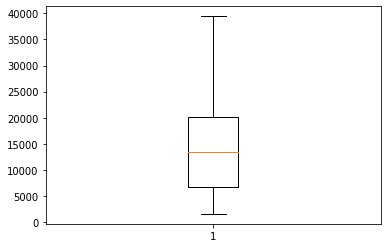

In [20]:
plt.boxplot(data_train['cc_cons'])

In [22]:
num_data = num_data.drop(['cc_cons'],axis=1)

# Scaling the dependent_feature

In [23]:
def scaling(data):
    minmax=MinMaxScaler()
    minmax.fit(data)
    data_train_scale=pd.DataFrame(minmax.transform(data),columns=data.columns)
    data_train_scale=data_train_scale.set_index(data.index)
    return data_train_scale
data_scale=scaling(num_data)
data_scale.head()

,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
ID,,,,,,,,,,,,,,,,,,,,,
12554,0.194444,0.723975,0.594975,0.000111,0.262221,1.000000,0.589779,0.713972,0.012658,0.296296,...,1.000000,0.052632,0.450,0.195448,0.160520,0.056281,0.000000,0.623762,0.498476,0.075188
17645,0.194444,0.000000,0.445276,0.032671,0.556750,0.000000,0.129109,0.032068,0.000000,0.061728,...,0.391555,0.052632,0.925,0.189099,0.245277,0.469946,0.463415,0.603960,0.217869,0.654691
7604,0.750000,0.872240,0.111669,0.130021,0.026136,0.224811,0.882214,0.308980,0.531646,0.370370,...,0.390449,0.052632,0.975,0.052875,0.359437,0.463928,0.121951,0.000000,0.256591,1.000000
1590,0.027778,0.974763,0.735748,0.047623,0.328078,0.557041,0.636692,0.857393,0.658228,0.000000,...,0.342674,1.000000,0.425,0.072024,0.440054,0.421058,0.463415,0.801980,0.419213,0.170516
16556,0.166667,0.872240,0.156003,0.361602,0.094195,0.097530,0.049141,0.416382,0.835443,0.555556,...,0.145733,1.000000,0.575,0.202158,0.020189,0.495596,0.146341,0.297030,0.307488,0.641291


In [24]:
merge_data=pd.concat([cat_data,data_scale,data_train['cc_cons']],axis=1)
merge_data.head()

,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
ID,,,,,,,,,,,,,,,,,,,,,
12554,current,M,0.194444,0.723975,0.594975,0.000111,0.262221,1.000000,0.589779,0.713972,...,0.052632,0.450,0.195448,0.160520,0.056281,0.000000,0.623762,0.498476,0.075188,20014.0
17645,current,M,0.194444,0.000000,0.445276,0.032671,0.556750,0.000000,0.129109,0.032068,...,0.052632,0.925,0.189099,0.245277,0.469946,0.463415,0.603960,0.217869,0.654691,10173.0
7604,current,M,0.750000,0.872240,0.111669,0.130021,0.026136,0.224811,0.882214,0.308980,...,0.052632,0.975,0.052875,0.359437,0.463928,0.121951,0.000000,0.256591,1.000000,16095.0
1590,current,F,0.027778,0.974763,0.735748,0.047623,0.328078,0.557041,0.636692,0.857393,...,1.000000,0.425,0.072024,0.440054,0.421058,0.463415,0.801980,0.419213,0.170516,7707.0
16556,current,M,0.166667,0.872240,0.156003,0.361602,0.094195,0.097530,0.049141,0.416382,...,1.000000,0.575,0.202158,0.020189,0.495596,0.146341,0.297030,0.307488,0.641291,39456.0


# Skewness cheak

In [25]:
skew=merge_data.skew()
skew

age                      0.455764
region_code             -0.190733
cc_cons_apr              0.950307
dc_cons_apr              1.022063
cc_cons_may              0.951935
dc_cons_may              0.988034
cc_cons_jun              0.959841
dc_cons_jun              1.088507
cc_count_apr             1.090164
cc_count_may             0.881148
cc_count_jun             0.280408
dc_count_apr             0.893682
dc_count_may             1.155948
dc_count_jun             0.577510
card_lim                 0.069251
investment_1             1.000492
investment_2             0.903871
investment_3             0.825876
investment_4             0.511202
debit_amount_apr         0.890368
credit_amount_apr        0.885099
debit_count_apr          0.493456
credit_count_apr         1.004090
max_credit_amount_apr    1.002865
debit_amount_may         0.926990
credit_amount_may        0.910615
credit_count_may         0.962620
debit_count_may          0.577601
max_credit_amount_may    0.942760
debit_amount_j

In [26]:
for col in skew[skew>1].index:
    merge_data[col]=np.log1p(merge_data[col])

In [27]:
merge_data.skew()

age                      0.455764
region_code             -0.190733
cc_cons_apr              0.950307
dc_cons_apr              0.776853
cc_cons_may              0.951935
dc_cons_may              0.988034
cc_cons_jun              0.959841
dc_cons_jun              0.839524
cc_count_apr             0.904539
cc_count_may             0.881148
cc_count_jun             0.280408
dc_count_apr             0.893682
dc_count_may             0.944399
dc_count_jun             0.577510
card_lim                 0.069251
investment_1             0.830930
investment_2             0.903871
investment_3             0.825876
investment_4             0.511202
debit_amount_apr         0.890368
credit_amount_apr        0.885099
debit_count_apr          0.493456
credit_count_apr         0.856307
max_credit_amount_apr    0.723361
debit_amount_may         0.926990
credit_amount_may        0.910615
credit_count_may         0.962620
debit_count_may          0.577601
max_credit_amount_may    0.942760
debit_amount_j

# Encoding the cat Feature:

In [28]:
def encoding(data):
    for col in data.select_dtypes(include='object').columns:
        data[col]=pd.get_dummies(data[col])
    return data
    
merge_data=encoding(merge_data)

In [29]:
merge_data.head()

,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
ID,,,,,,,,,,,,,,,,,,,,,
12554,1,0,0.194444,0.723975,0.594975,0.000111,0.262221,1.000000,0.589779,0.538813,...,0.052632,0.450,0.195448,0.160520,0.056281,0.000000,0.623762,0.498476,0.072495,20014.0
17645,1,0,0.194444,0.000000,0.445276,0.032149,0.556750,0.000000,0.129109,0.031565,...,0.052632,0.925,0.189099,0.245277,0.469946,0.380772,0.603960,0.217869,0.503614,10173.0
7604,1,0,0.750000,0.872240,0.111669,0.122236,0.026136,0.224811,0.882214,0.269249,...,0.052632,0.975,0.052875,0.359437,0.463928,0.115069,0.000000,0.256591,0.693147,16095.0
1590,1,1,0.027778,0.974763,0.735748,0.046523,0.328078,0.557041,0.636692,0.619174,...,1.000000,0.425,0.072024,0.440054,0.421058,0.380772,0.801980,0.419213,0.157444,7707.0
16556,1,0,0.166667,0.872240,0.156003,0.308662,0.094195,0.097530,0.049141,0.348106,...,1.000000,0.575,0.202158,0.020189,0.495596,0.136576,0.297030,0.307488,0.495483,39456.0


In [30]:
merge_data.describe().T

,count,mean,std,min,25%,50%,75%,max
account_type,15000.0,0.848467,0.358580,0.0,1.000000,1.000000,1.000000,1.000000
gender,15000.0,0.137000,0.343859,0.0,0.000000,0.000000,0.000000,1.000000
age,15000.0,0.426200,0.341443,0.0,0.138889,0.333333,0.694444,1.000000
region_code,15000.0,0.544722,0.331886,0.0,0.276025,0.589905,0.867508,1.000000
cc_cons_apr,15000.0,0.336462,0.319272,0.0,0.079778,0.227608,0.507239,1.000000
dc_cons_apr,15000.0,0.253089,0.223416,0.0,0.067343,0.182745,0.403015,0.693147
cc_cons_may,15000.0,0.334196,0.323397,0.0,0.073603,0.217039,0.507945,1.000000
dc_cons_may,15000.0,0.331265,0.318329,0.0,0.078669,0.217624,0.497927,1.000000
cc_cons_jun,15000.0,0.336736,0.318845,0.0,0.082849,0.222134,0.511780,1.000000
dc_cons_jun,15000.0,0.244836,0.222428,0.0,0.060811,0.173914,0.382554,0.693147


In [46]:
# q1 = merge_data['cc_cons'].quantile(0.25)
# q3 = merge_data['cc_cons'].quantile(0.75)
# iqr = q3-q1
# iqr

In [131]:
#merge_data=merge_data[~((merge_data['cc_cons'] < (q1 - 1.5 * iqr)) |(merge_data['cc_cons'] > (q3 + 1.5 * iqr)))]

In [33]:
merge_data.head()

,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
ID,,,,,,,,,,,,,,,,,,,,,
12554,1,0,0.194444,0.723975,0.594975,0.000111,0.262221,1.000000,0.589779,0.538813,...,0.032790,0.450,0.195448,0.160520,0.056281,0.000000,0.623762,0.498476,0.072495,20014.0
17645,1,0,0.194444,0.000000,0.445276,0.032149,0.556750,0.000000,0.129109,0.031565,...,0.032790,0.925,0.189099,0.245277,0.469946,0.380772,0.603960,0.217869,0.503614,10173.0
7604,1,0,0.750000,0.872240,0.111669,0.122236,0.026136,0.224811,0.882214,0.269249,...,0.032790,0.975,0.052875,0.359437,0.463928,0.115069,0.000000,0.256591,0.693147,16095.0
1590,1,1,0.027778,0.974763,0.735748,0.046523,0.328078,0.557041,0.636692,0.619174,...,0.550046,0.425,0.072024,0.440054,0.421058,0.380772,0.801980,0.419213,0.157444,7707.0
16556,1,0,0.166667,0.872240,0.156003,0.308662,0.094195,0.097530,0.049141,0.348106,...,0.569095,0.575,0.202158,0.020189,0.495596,0.136576,0.297030,0.307488,0.495483,39456.0


# Feature Engineering

In [31]:
corr_matrix=merge_data.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]
print(to_drop)

# Dropping the high correlated features
print("Columns to be dropped: ")
merge_data.drop(to_drop,axis=1,inplace=True)

[]
Columns to be dropped: 


In [ ]:
def feature_best_no(X,y,model):
    nof_list=[10,15,20,25,30,40]
    high_score=0
    nof=0
   
    for n in nof_list:
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.3,random_state = 0)
        models=model()
        rfe=RFE(models,n)
        X_train_rfe=rfe.fit_transform(X_train,y_train)
        X_test_rfe=rfe.transform(X_test)
        model.fit(X_train_rfe,y_train)
        if model.score(X_test_rfe,y_test)>high_score:
            high_score=model.score(X_test_rfe,y_test)
            nof=n
        return nof
        
feature_best_no(X,y,RandomForestRegressor)



In [56]:
def feature_selection(predictors,target,number_of_features,model):

    models = model()
    rfe = RFE(models,number_of_features)
    rfe = rfe.fit(X,y)
    feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
    feature=feature_ranking[feature_ranking.values==1].index.tolist()
    return feature
    

feature=feature_selection(X,y,30,RandomForestRegressor)
new_df=df[feature]

NameError: name 'X' is not defined

### vanilla model algorithm

## `Linear Model`

In [33]:
y=merge_data['cc_cons']
X=merge_data.drop('cc_cons',axis=1)
merge_data.describe().T

,count,mean,std,min,25%,50%,75%,max
account_type,15000.0,0.848467,0.358580,0.0,1.000000,1.000000,1.000000,1.000000
gender,15000.0,0.137000,0.343859,0.0,0.000000,0.000000,0.000000,1.000000
age,15000.0,0.426200,0.341443,0.0,0.138889,0.333333,0.694444,1.000000
region_code,15000.0,0.544722,0.331886,0.0,0.276025,0.589905,0.867508,1.000000
cc_cons_apr,15000.0,0.336462,0.319272,0.0,0.079778,0.227608,0.507239,1.000000
dc_cons_apr,15000.0,0.253089,0.223416,0.0,0.067343,0.182745,0.403015,0.693147
cc_cons_may,15000.0,0.334196,0.323397,0.0,0.073603,0.217039,0.507945,1.000000
dc_cons_may,15000.0,0.331265,0.318329,0.0,0.078669,0.217624,0.497927,1.000000
cc_cons_jun,15000.0,0.336736,0.318845,0.0,0.082849,0.222134,0.511780,1.000000
dc_cons_jun,15000.0,0.244836,0.222428,0.0,0.060811,0.173914,0.382554,0.693147


In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,)

In [35]:
def rmsle(actual_column, predicted_column):
    sum=0.0
    for x,y in zip(actual_column,predicted_column):
        if x<0 or y<0: #check for negative values. 
            continue
        p = np.log(y+1)
        r = np.log(x+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted_column))**0.5

In [36]:
def model(model,X_train,X_test,y_train,y_test):
    mod=model()
    mod.fit(X_train,y_train)
    y=mod.predict(X_test)
    msle=rmsle(y_test,y)
    mse=np.sqrt(mean_squared_error(y_test,y))
    r2=r2_score(y_test,y)
    score=mod.score(X_test,y_test)
    return (msle,mse,r2,score)

In [37]:
y_test.isna().sum()

0

In [38]:
model(LinearRegression,X_train,X_test,y_train,y_test)

(1.0072685831020722,
 13058.386869982633,
 -0.00198754557384917,
 -0.00198754557384917)

In [39]:
model(Lasso,X_train,X_test,y_train,y_test)

(1.0072475412037463,
 13057.751750160953,
 -0.0018900807519275364,
 -0.0018900807519275364)

In [40]:
model(Ridge,X_train,X_test,y_train,y_test)

(1.0072673443297588,
 13058.357912912283,
 -0.0019831017490548053,
 -0.0019831017490548053)

## ` Polynomial model`

In [41]:
poly_model = make_pipeline(PolynomialFeatures(2),LinearRegression())

In [42]:
poly_model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [43]:
y_poly=poly_model.predict(X_test)

In [44]:
np.sqrt(mean_squared_log_error(y_test,y_poly))

1.0231265591182834

## ` DecisionTree Regressor`

In [45]:
tree=DecisionTreeRegressor(random_state=42,max_depth=4)
tree.fit(X_train,y_train)
y_tree=tree.predict(X_test)
rmsle(y_test,y_tree)

1.00825295726479

## `RandomForest Regressor`

In [46]:
rfor=RandomForestRegressor(n_estimators=100,n_jobs=100,random_state=0, min_samples_leaf=100)
rfor.fit(X_train,y_train)
y_rf=rfor.predict(X_test)
rmsle(y_test,y_rf)
#r2_score((np.exp(y_test)-1),(np.exp(y_rf)-1))


1.0074245053409832

## ` XGBRegressor`

In [47]:
tree=DecisionTreeRegressor(random_state=42,max_depth=4)
xgb_clf=XGBRFRegressor(base_estimator=tree, random_state=0)
xgb_clf.fit(X_train,y_train)
xg_y=xgb_clf.predict(X_test)
rmsle(y_test,xg_y)

[13:46:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


1.0061641805178039

## ` GradientBoostingRegressor`

In [48]:
gd=GradientBoostingRegressor(random_state=0)
gd.fit(X_train,y_train)
y_gd=gd.predict(X_test)
rmsle(y_test,y_gd)

1.0104797536158523

# Hyper Parameter Tuning
### Grid Search

In [49]:
parameter_grid = {"max_depth": [2,3, 5],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False]}

In [50]:
rf=RandomForestRegressor()
grid_search=GridSearchCV(estimator=rf,param_grid =parameter_grid)
grid_search.fit(X_train,y_train)
y_gs=grid_search.predict(X_test)
rmsle(y_test,y_gs)

1.0067194097849486

In [65]:
best_param=grid_search.best_params_

### Random Search

In [71]:
random_search=RandomizedSearchCV(estimator=rf,param_distributions =parameter_grid,n_iter=20,random_state=0)
random_search.fit(X_train,y_train)
y_rs=random_search.predict(X_test)
rmsle(y_test,y_rs)

1.0069742118107694

In [72]:
random_search.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_features': 1,
 'max_depth': 2,
 'bootstrap': False}

## submissison model

In [53]:
# training data
merge_data.head()

,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
ID,,,,,,,,,,,,,,,,,,,,,
12554,1,0,0.194444,0.723975,0.594975,0.000111,0.262221,1.000000,0.589779,0.538813,...,0.052632,0.450,0.195448,0.160520,0.056281,0.000000,0.623762,0.498476,0.072495,20014.0
17645,1,0,0.194444,0.000000,0.445276,0.032149,0.556750,0.000000,0.129109,0.031565,...,0.052632,0.925,0.189099,0.245277,0.469946,0.380772,0.603960,0.217869,0.503614,10173.0
7604,1,0,0.750000,0.872240,0.111669,0.122236,0.026136,0.224811,0.882214,0.269249,...,0.052632,0.975,0.052875,0.359437,0.463928,0.115069,0.000000,0.256591,0.693147,16095.0
1590,1,1,0.027778,0.974763,0.735748,0.046523,0.328078,0.557041,0.636692,0.619174,...,1.000000,0.425,0.072024,0.440054,0.421058,0.380772,0.801980,0.419213,0.157444,7707.0
16556,1,0,0.166667,0.872240,0.156003,0.308662,0.094195,0.097530,0.049141,0.348106,...,1.000000,0.575,0.202158,0.020189,0.495596,0.136576,0.297030,0.307488,0.495483,39456.0


In [54]:
#final train data
train_x=merge_data.iloc[:,:-1]
train_y=merge_data.iloc[:,-1]
train_x.shape

(15000, 37)

In [55]:
#final test data
test=pd.read_csv('test.csv').set_index('ID')

In [56]:
test['investment_4']=test['investment_4'].apply(lambda x:-x if x<0 else x)

In [57]:

num_test=test.select_dtypes(exclude='object')
cat_test=test.select_dtypes(include='object')

In [58]:
num_test=treat_outliers(num_test)
num_testt=scaling(num_test)
detect_outliers(num_test)

,Feature,Number of Outliers
0,age,0
1,region_code,0
2,cc_cons_apr,0
3,dc_cons_apr,0
4,cc_cons_may,0
5,dc_cons_may,0
6,cc_cons_jun,0
7,dc_cons_jun,0
8,cc_count_apr,0
9,cc_count_may,0


In [59]:
test=pd.concat([cat_test,num_test],axis=1)

In [60]:
test


,account_type,gender,loan_enq,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
ID,,,,,,,,,,,,,,,,,,,,,
17591,current,M,Y,37,575,2795.450,1290.00,6141.05,676.50,9146.10,...,41755.00,24.0,20.0,9750.0,30527.88,31271.00,3.0,12.0,25945.92,1170.49
13541,current,M,Y,33,394,28989.000,1640.00,1670.00,2463.92,10947.50,...,127072.84,30.0,40.0,16967.0,14342.83,16582.00,6.0,39.0,12214.00,13507.92
13431,current,M,Y,53,324,5985.200,6189.00,2696.09,766.00,813.00,...,40422.00,30.0,35.0,36398.0,32503.16,33539.54,5.0,9.0,13215.00,2622.28
8687,current,M,Y,33,370,2105.930,13282.50,25889.03,411.00,4260.27,...,48148.00,3.0,5.0,81500.0,93572.42,109429.75,21.0,1.0,70707.00,340.79
14727,current,M,Y,60,505,3269.000,3532.00,3158.40,2699.77,3373.48,...,25926.00,30.0,75.0,27936.0,19011.50,41401.00,6.0,35.0,42344.00,2812.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12512,current,M,Y,35,523,4641.500,5979.58,6008.61,4410.00,19044.00,...,45461.00,30.0,11.0,32944.0,105488.53,120637.00,21.0,50.0,58037.00,7870.88
14224,current,M,Y,53,723,4994.450,2805.37,23214.00,5870.00,1041.00,...,85422.00,5.0,8.0,8850.0,77112.66,86559.00,43.0,38.0,24110.00,3668.30
18740,current,M,Y,60,863,3262.145,2871.00,7335.25,11774.04,4130.00,...,68985.86,10.0,81.0,35819.0,57192.48,80627.00,2.0,18.0,1769.00,5450.34


In [61]:
test=test.drop(std_0,axis=1)

In [62]:
test=test.drop('loan_enq',axis=1)

In [63]:
test=encoding(test)

In [ ]:
#Here we are using best hyperparameter of gridserch

In [76]:
rf=RandomForestRegressor(bootstrap= True,
 max_depth= 3,
 max_features= 1,
 min_samples_leaf= 1,
 min_samples_split= 2)
grid_search=GridSearchCV(estimator=rf,param_grid =parameter_grid)
grid_search.fit(train_x,train_y)
y_gs=grid_search.predict(test)

In [73]:
sample_submission=pd.DataFrame(y_gs,index=test.index,columns=['cc_cons'])

In [74]:
sample_submission.to_csv('sample_submission@.csv')